# DS-SF-36 | 10 | Linear Regression, Part 3 | Codealong | Starter Code

In [20]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import math
import seaborn as sns

## Part A | Model Fit and Customer Retention

In [2]:
train_df = pd.DataFrame({'t': range(8),
        'survival_rate': [1., .869, .743, .653, .593, .551, .517, .491]},
    columns = ['t', 'survival_rate'])


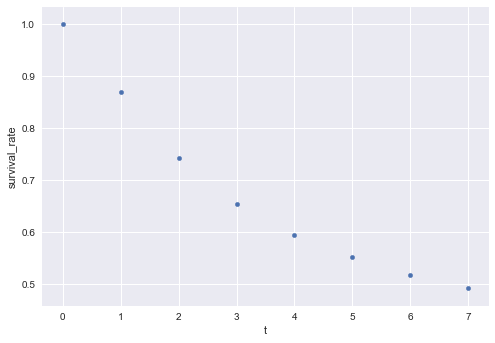

In [10]:
train_df.plot(kind = 'scatter', x = 't', y = 'survival_rate')

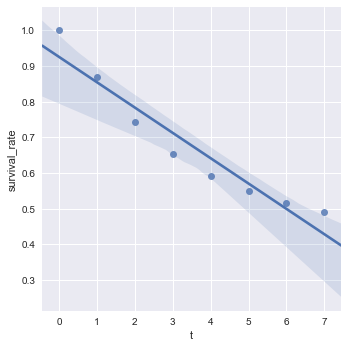

In [11]:
sns.lmplot(x = 't', y = 'survival_rate', data = train_df)

In [45]:
train_df['survival_rate_hat'] = model.predict(pd.DataFrame(train_df['t']))
train_df

,t,survival_rate,log_survival_rate,survival_rate_hat
0,0,1.000,0.000000,0.925417
1,1,0.869,-0.140412,0.854476
2,2,0.743,-0.297059,0.783536
3,3,0.653,-0.426178,0.712595
4,4,0.593,-0.522561,0.641655
5,5,0.551,-0.596020,0.570714
6,6,0.517,-0.659712,0.499774
7,7,0.491,-0.711311,0.428833


In [41]:
train_df['t']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
Name: t, dtype: int32

In [37]:
model = smf.ols(formula = 'survival_rate ~ t + 1', data = train_df).fit()
model.summary()

C:\Users\amiao\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          survival_rate   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           0.000153
Time:                        20:06:40   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
t             -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
predict_X = pd.DataFrame({'t': [8, 9, 10]}, columns = ['t'])
predict_X = sm.add_constant(predict_X)
predict_X

,const,t
0,1,8
1,1,9
2,1,10


In [9]:
predict_y = model.predict(predict_X)
predict_y

array([ 0.35789286,  0.28695238,  0.2160119 ])

In [30]:
train_df['log_survival_rate'] = np.log(train_df.survival_rate)

In [56]:
spline_model = smf.ols(formula = 'log_survival_rate ~ t^2 + t + 1', data = train_df).fit()
spline_model.summary()

C:\Users\amiao\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_survival_rate   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     66.55
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           0.000249
Time:                        20:30:21   Log-Likelihood:                 13.403
No. Observations:                   8   AIC:                            -20.81
Df Residuals:                       5   BIC:                            -20.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0641      0.040     -1.605      0.169        -0.167     0.039
t ^ 2          0.0015      0.011      0.131      0.901        -0.027     0.030
t             -0.1029      0.011     -9.141      0.000        -0.132    -0.074
==============================================================================
Omnibus:                        1.686   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                0.740
Skew:                           0.204   Prob(JB):                        0.691
Kurtosis:                       1.567   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
log_model = smf.ols(formula = 'log_survival_rate ~ t + 1', data = train_df).fit()
log_model.summary()

C:\Users\amiao\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_survival_rate   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           1.52e-05
Time:                        20:02:55   Log-Likelihood:                 13.389
No. Observations:                   8   AIC:                            -22.78
Df Residuals:                       6   BIC:                            -22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0621      0.034     -1.836      0.116        -0.145     0.021
t             -0.1020      0.008    -12.615      0.000        -0.122    -0.082
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   0.610
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                0.739
Skew:                           0.196   Prob(JB):                        0.691
Kurtosis:                       1.564   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
train_df['survival_rate_hat_log'] = np.exp(log_model.predict(pd.DataFrame(train_df['t'])))
train_df

,t,survival_rate,log_survival_rate,survival_rate_hat,survival_rate_hat_log
0,0,1.000,0.000000,0.925417,0.939773
1,1,0.869,-0.140412,0.854476,0.848633
2,2,0.743,-0.297059,0.783536,0.766332
3,3,0.653,-0.426178,0.712595,0.692013
4,4,0.593,-0.522561,0.641655,0.624901
5,5,0.551,-0.596020,0.570714,0.564297
6,6,0.517,-0.659712,0.499774,0.509572
7,7,0.491,-0.711311,0.428833,0.460153


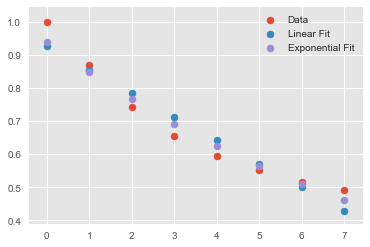

In [55]:
import matplotlib.pyplot as plt
jet=plt.get_cmap('coolwarm')
x = train_df['t']
y = train_df['survival_rate']
y1 = train_df['survival_rate_hat']
y2 = train_df['survival_rate_hat_log']
plt.scatter(x, y, label = 'Data')
plt.scatter(x, y1, label = 'Linear Fit')
plt.scatter(x, y2, label = 'Exponential Fit')
plt.legend(loc='upper right');
plt.show()


## Part B | One-Hot Encoding for Categorical Variables and SF Housing

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-10-zillow.csv'), index_col = 'ID')

In [ ]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [ ]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

> ### What's the bathrooms' distribution in the dataset?

In [ ]:
# TODO

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [ ]:
# TODO

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [ ]:
# TODO

In [ ]:
baths_df

In [ ]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
    'Bath_2.0': 'Bath_2',
    'Bath_3.0': 'Bath_3',
    'Bath_4.0': 'Bath_4'}, inplace = True)

In [ ]:
baths_df

In [ ]:
df = df.join([baths_df])

In [ ]:
df.columns

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [ ]:
# TODO

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [ ]:
# TODO

## Part C | The Adverstising Dataset

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-10-advertising.csv'))

In [ ]:
df

### Plots

> ### Sales ~ TV

In [ ]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

### Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

model.summary()

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D | Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [ ]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass